#  <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50"> Credit Score Prediction</p>

### <p style="font-family:newtimeroman;font-size:100%;text-align:center;overflow:hidden;font-weight:50"> -  By Hitesh Bagade</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from warnings import filterwarnings
filterwarnings("ignore")

###  <p style="padding:10px;background-color:Pink ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Data Ingestion</p>

In [2]:
df=pd.read_csv(r"D:\Classification_HW Assignment\train.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.shape

(100000, 28)

##  <p style="padding:10px;background-color:Pink ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Data Cleaning</p>

In [5]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [6]:
A=df.drop(["ID","Customer_ID","Name","SSN"],axis=1)

In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

## Remove Typing Error

### i) Remove underscore from data points 

In [8]:
err=[]
for i in A.select_dtypes(include='object').columns:
    print(i,"--",A[i].astype('object').str.endswith("_").sum())
    if(A[i].astype('object').str.endswith("_").sum()>0):
        err.append(i)

Month -- 0
Age -- 4939
Occupation -- 7062
Annual_Income -- 6980
Num_of_Loan -- 4785
Type_of_Loan -- 0
Num_of_Delayed_Payment -- 2744
Changed_Credit_Limit -- 2091
Credit_Mix -- 20195
Outstanding_Debt -- 1009
Credit_History_Age -- 0
Payment_of_Min_Amount -- 0
Amount_invested_monthly -- 4305
Payment_Behaviour -- 0
Monthly_Balance -- 9
Credit_Score -- 0


In [9]:
err

['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [10]:
for i in err:
    a=[j.split("_")[0] for j in A[i].astype(str)]
    A[i]=a

In [11]:
for i in A.columns:
    print(i,"--",A[i].astype(str).str.endswith("_").sum())

Month -- 0
Age -- 0
Occupation -- 0
Annual_Income -- 0
Monthly_Inhand_Salary -- 0
Num_Bank_Accounts -- 0
Num_Credit_Card -- 0
Interest_Rate -- 0
Num_of_Loan -- 0
Type_of_Loan -- 0
Delay_from_due_date -- 0
Num_of_Delayed_Payment -- 0
Changed_Credit_Limit -- 0
Num_Credit_Inquiries -- 0
Credit_Mix -- 0
Outstanding_Debt -- 0
Credit_Utilization_Ratio -- 0
Credit_History_Age -- 0
Payment_of_Min_Amount -- 0
Total_EMI_per_month -- 0
Amount_invested_monthly -- 0
Payment_Behaviour -- 0
Monthly_Balance -- 0
Credit_Score -- 0


### ii) Garbage Values 

In [12]:
for i in A.columns:
    print(i,"--",A[i].astype(str).str.startswith("!").sum())

Month -- 0
Age -- 0
Occupation -- 0
Annual_Income -- 0
Monthly_Inhand_Salary -- 0
Num_Bank_Accounts -- 0
Num_Credit_Card -- 0
Interest_Rate -- 0
Num_of_Loan -- 0
Type_of_Loan -- 0
Delay_from_due_date -- 0
Num_of_Delayed_Payment -- 0
Changed_Credit_Limit -- 0
Num_Credit_Inquiries -- 0
Credit_Mix -- 0
Outstanding_Debt -- 0
Credit_Utilization_Ratio -- 0
Credit_History_Age -- 0
Payment_of_Min_Amount -- 0
Total_EMI_per_month -- 0
Amount_invested_monthly -- 0
Payment_Behaviour -- 7600
Monthly_Balance -- 0
Credit_Score -- 0


In [13]:
A.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [14]:
A["Payment_Behaviour"][A["Payment_Behaviour"].astype(str).str.startswith("!")]=np.nan

In [15]:
for i in A.columns:
    print(i,"--",A[i].astype(str).str.startswith("!").sum())

Month -- 0
Age -- 0
Occupation -- 0
Annual_Income -- 0
Monthly_Inhand_Salary -- 0
Num_Bank_Accounts -- 0
Num_Credit_Card -- 0
Interest_Rate -- 0
Num_of_Loan -- 0
Type_of_Loan -- 0
Delay_from_due_date -- 0
Num_of_Delayed_Payment -- 0
Changed_Credit_Limit -- 0
Num_Credit_Inquiries -- 0
Credit_Mix -- 0
Outstanding_Debt -- 0
Credit_Utilization_Ratio -- 0
Credit_History_Age -- 0
Payment_of_Min_Amount -- 0
Total_EMI_per_month -- 0
Amount_invested_monthly -- 0
Payment_Behaviour -- 0
Monthly_Balance -- 0
Credit_Score -- 0


In [16]:
A.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

### iii) False Entries

In [17]:
A["Age"][A["Age"].astype('int32')>110]

56       7580
122       181
219       995
243      5079
288      6409
         ... 
99877    6476
99908    4808
99913    2263
99950    1342
99972    1753
Name: Age, Length: 1888, dtype: object

In [18]:
A["Age"][A["Age"].astype('int32')>110]=np.nan

### iii) Negative values

In [19]:
neg=[]
for i in A.columns:
    print(i,"--",A[i].astype(str).str.startswith("-").sum())
    if(A[i].astype(str).str.startswith("-").sum()>0):
        neg.append(i)

Month -- 0
Age -- 886
Occupation -- 0
Annual_Income -- 0
Monthly_Inhand_Salary -- 0
Num_Bank_Accounts -- 21
Num_Credit_Card -- 0
Interest_Rate -- 0
Num_of_Loan -- 3876
Type_of_Loan -- 0
Delay_from_due_date -- 591
Num_of_Delayed_Payment -- 644
Changed_Credit_Limit -- 1586
Num_Credit_Inquiries -- 0
Credit_Mix -- 0
Outstanding_Debt -- 0
Credit_Utilization_Ratio -- 0
Credit_History_Age -- 0
Payment_of_Min_Amount -- 0
Total_EMI_per_month -- 0
Amount_invested_monthly -- 0
Payment_Behaviour -- 0
Monthly_Balance -- 0
Credit_Score -- 0


In [20]:
neg

['Age',
 'Num_Bank_Accounts',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit']

In [21]:
for i in neg:
    A[i][A[i].astype(str).str.startswith("-")]=np.nan

In [22]:
for i in A.columns:
    print(i,"--",A[i].astype(str).str.startswith("-").sum())

Month -- 0
Age -- 0
Occupation -- 0
Annual_Income -- 0
Monthly_Inhand_Salary -- 0
Num_Bank_Accounts -- 0
Num_Credit_Card -- 0
Interest_Rate -- 0
Num_of_Loan -- 0
Type_of_Loan -- 0
Delay_from_due_date -- 0
Num_of_Delayed_Payment -- 0
Changed_Credit_Limit -- 0
Num_Credit_Inquiries -- 0
Credit_Mix -- 0
Outstanding_Debt -- 0
Credit_Utilization_Ratio -- 0
Credit_History_Age -- 0
Payment_of_Min_Amount -- 0
Total_EMI_per_month -- 0
Amount_invested_monthly -- 0
Payment_Behaviour -- 0
Monthly_Balance -- 0
Credit_Score -- 0


## Convert Columns to its correct data type

In [23]:
xcat=A.select_dtypes(include='object')
xcat.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [24]:
col=["Age","Annual_Income","Changed_Credit_Limit","Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]

In [25]:
from hiteshmodule import object_to_numeric
A=object_to_numeric(col,A)

Errors are converted to NaN


## Missing Data Treatment

In [26]:
A.isna().sum()

Month                           0
Age                          2774
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Type_of_Loan                11408
Delay_from_due_date           591
Num_of_Delayed_Payment        644
Changed_Credit_Limit         3677
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [27]:
from hiteshmodule import MDT

In [28]:
MDT(A)

missing data is replaced with median value of column for continuous data and with column mode for categorical data


,missing
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [29]:
#A.isna().sum()

###  <p style="padding:10px;background-color:Pink ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Feature Engineering</p>

### Extracting Age in numbers from the object column

In [30]:
import re

In [30]:
l="15 Years and 6 Months"
years = re.search(r'(\d+)\s*Years?',l)
years.group(1)
months=re.search(r'(\d+)\s*Months?',l)
years.group(1),months.group(1)

('15', '6')

In [11]:
import re

l = "15 Years and 6 Months"
match = re.search(r'(\d+)\s*Years?\D*(\d+)\s*Months?', l)
match.groups()

('15', '6')

In [32]:
credit_age=[]
for i in A.Credit_History_Age:
    years = re.search(r'(\d+)\s*Years?',i)
    yr=years.group(1) if years else 0
    months=re.search(r'(\d+)\s*Months?',i)
    m=months.group(1) if months else 0
    age=round(int(yr)+(int(m)/12),2)
    credit_age.append(age)

In [33]:
A["Credit_History_Age"]=credit_age

## <p style="padding:10px;background-color:Pink ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">EDA</p>

In [61]:
A.corr(numeric_only=True)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.089686,0.072557,-0.185353,-0.143170,-0.210560,-0.171238,-0.155674,-0.241232,-0.201532,0.024676,0.220140,-0.073191,0.045154,0.110414
Annual_Income,0.089686,1.000000,0.838999,-0.257601,-0.203730,-0.280025,-0.228634,-0.151097,-0.260608,-0.265300,0.159013,0.247992,0.456632,0.497619,0.518865
Monthly_Inhand_Salary,0.072557,0.838999,1.000000,-0.214688,-0.175269,-0.242290,-0.195921,-0.125180,-0.226726,-0.234397,0.128426,0.215842,0.426554,0.459339,0.489784
Num_Bank_Accounts,-0.185353,-0.257601,-0.214688,1.000000,0.432043,0.570645,0.546056,0.314032,0.501360,0.494039,-0.070932,-0.456507,0.096347,-0.146227,-0.266845
Num_Credit_Card,-0.143170,-0.203730,-0.175269,0.432043,1.000000,0.481997,0.454967,0.230865,0.440196,0.469874,-0.054606,-0.389525,0.102438,-0.114933,-0.223888
Interest_Rate,-0.210560,-0.280025,-0.242290,0.570645,0.481997,1.000000,0.556020,0.342478,0.609085,0.620662,-0.075321,-0.541573,0.133230,-0.163277,-0.303011
Delay_from_due_date,-0.171238,-0.228634,-0.195921,0.546056,0.454967,0.556020,1.000000,0.274308,0.505748,0.527630,-0.063642,-0.452361,0.125913,-0.133475,-0.258664
Changed_Credit_Limit,-0.155674,-0.151097,-0.125180,0.314032,0.230865,0.342478,0.274308,1.000000,0.355910,0.364136,-0.046394,-0.383757,0.101318,-0.090531,-0.176846
Num_Credit_Inquiries,-0.241232,-0.260608,-0.226726,0.501360,0.440196,0.609085,0.505748,0.355910,1.000000,0.584848,-0.073296,-0.566253,0.152802,-0.146213,-0.296319
Outstanding_Debt,-0.201532,-0.265300,-0.234397,0.494039,0.469874,0.620662,0.527630,0.364136,0.584848,1.000000,-0.073920,-0.571652,0.155203,-0.146984,-0.315431


<Axes: >

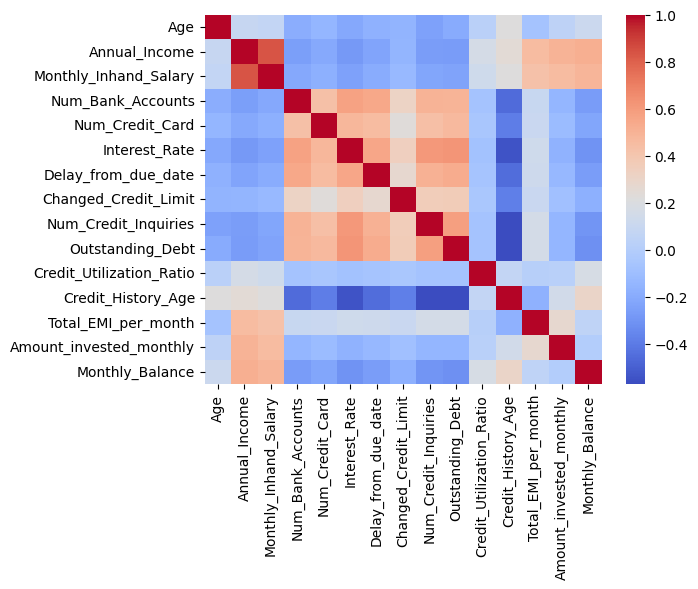

In [62]:
sb.heatmap(A.corr(numeric_only=True),cmap='coolwarm')

<Axes: xlabel='Credit_Score', ylabel='Age'>

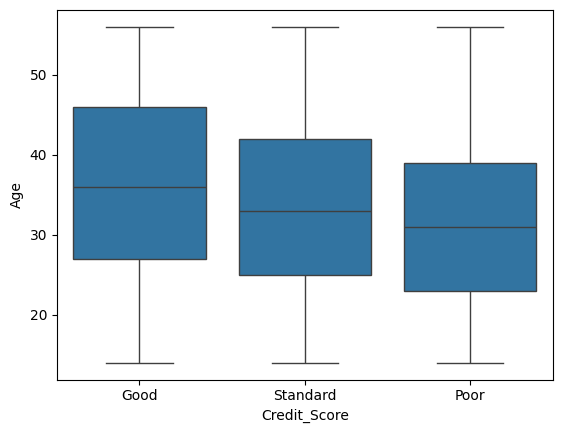

In [63]:
sb.boxplot(x=A.Credit_Score,y=A.Age)

<Axes: xlabel='Credit_Score', ylabel='Outstanding_Debt'>

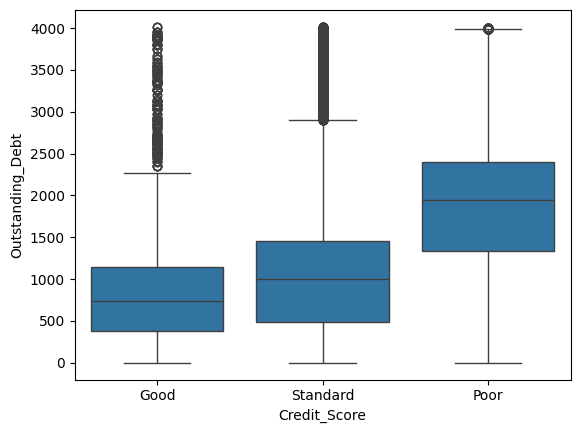

In [64]:
sb.boxplot(x=A.Credit_Score,y=A.Outstanding_Debt)

<Axes: xlabel='Credit_Score', ylabel='Credit_History_Age'>

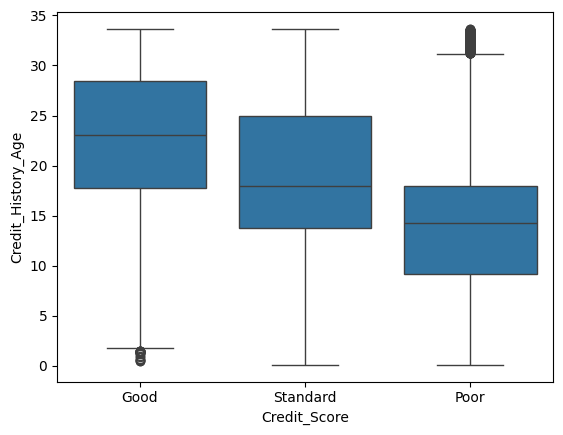

In [65]:
sb.boxplot(x=A.Credit_Score,y=A.Credit_History_Age)

###  <p style="padding:10px;background-color:yellow ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">We can observe valuable difference in all three plots. Hence Credit History Age and outstanding deptcan be good predictors for credit score</p>

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

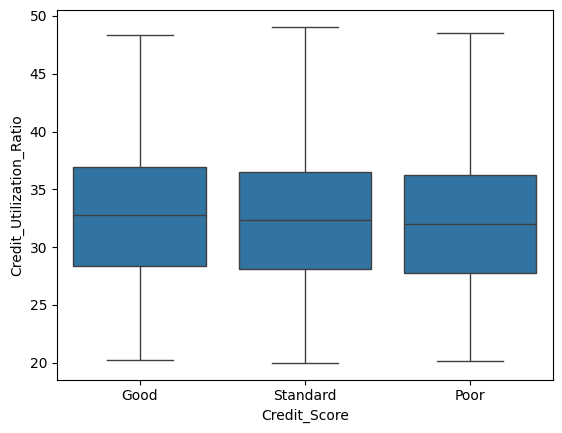

In [66]:
sb.boxplot(x=A.Credit_Score,y=A.Credit_Utilization_Ratio)

###  <p style="padding:10px;background-color:yellow ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">There is not much affect of Credit ratio on Credit Score category</p>

## Skewness Treatment 

In [34]:
skewcol=[]
for i in A.select_dtypes(exclude='object').columns:
    if((A[i].skew()>2) | (A[i].skew()<-2)):
        skewcol.append(i)

In [35]:
skewcol

['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_Credit_Inquiries',
 'Total_EMI_per_month',
 'Amount_invested_monthly']

## Outlier Detection

In [36]:
xcont=A.select_dtypes(exclude='object')
xcat=A.select_dtypes(include='object')
xcont.shape,xcat.shape

((100000, 15), (100000, 9))

In [37]:
print("                      Number of Outliers                ")
for i in xcont.columns:
    q1=xcont[i].quantile(0.25)
    q3=xcont[i].quantile(0.75)
    iqr=q3-q1
    th=iqr*1.5
    print(i," -- ",xcont[i][(xcont[i]< q1 - th) | (xcont[i]> q3 + th)].count())

                      Number of Outliers                
Age  --  7
Annual_Income  --  2783
Monthly_Inhand_Salary  --  4365
Num_Bank_Accounts  --  1315
Num_Credit_Card  --  2271
Interest_Rate  --  2034
Delay_from_due_date  --  4002
Changed_Credit_Limit  --  1472
Num_Credit_Inquiries  --  1650
Outstanding_Debt  --  5272
Credit_Utilization_Ratio  --  4
Credit_History_Age  --  0
Total_EMI_per_month  --  6795
Amount_invested_monthly  --  9211
Monthly_Balance  --  7864


In [38]:
 print("                      Number of Outliers                ")
for i in xcont.columns:
    q1=xcont[i].quantile(0.25)
    q3=xcont[i].quantile(0.75)
    iqr=q3-q1
    th=iqr*1.5
    xcont[i][xcont[i]<q1-th]=q1
    xcont[i][xcont[i]>q3+th]=q3
    print(i," -- ",xcont[i][(xcont[i]< q1 - th) | (xcont[i]> q3 + th)].count())

                      Number of Outliers                
Age  --  0
Annual_Income  --  0
Monthly_Inhand_Salary  --  0
Num_Bank_Accounts  --  0
Num_Credit_Card  --  0
Interest_Rate  --  0
Delay_from_due_date  --  0
Changed_Credit_Limit  --  0
Num_Credit_Inquiries  --  0
Outstanding_Debt  --  0
Credit_Utilization_Ratio  --  0
Credit_History_Age  --  0
Total_EMI_per_month  --  0
Amount_invested_monthly  --  0
Monthly_Balance  --  0


##  <p style="padding:10px;background-color:Pink ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Preprocessing</p>

In [39]:
from hiteshmodule import preprocessing
A=pd.concat([xcont,xcat],axis=1)

In [40]:
y=A["Credit_Score"]
x=A.drop("Credit_Score",axis=1)

In [41]:
xnew=preprocessing(x)

continuous data is standardized using minmax scalar and categorical data is one hot encoded


In [42]:
xnew.shape

(100000, 7426)

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ynew=le.fit_transform(y)

In [44]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(xnew,ynew,test_size=0.2,random_state=50,stratify=ynew)

##  <p style="padding:10px;background-color:Pink ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Model Building</p>

### i) Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='saga',max_iter=500)
from hiteshmodule import mfit_multiclassifier
mfit_multiclassifier(lr,xtr,xts,ytr,yts)

Training accuracy-- 0.761825
Testing accuracy-- 0.7334
Recall-- 0.7334


### ii) CATBoost Classifier

In [46]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=10000, learning_rate=0.1, depth=10, verbose=100)
model.fit(xtr, ytr)

0:	learn: 1.0337778	total: 1.32s	remaining: 3h 40m 33s
100:	learn: 0.6197399	total: 1m 40s	remaining: 2h 43m 57s
200:	learn: 0.6081490	total: 3m 18s	remaining: 2h 41m 13s
300:	learn: 0.5978812	total: 5m 3s	remaining: 2h 42m 54s
400:	learn: 0.5873706	total: 6m 43s	remaining: 2h 41m 4s
500:	learn: 0.5802989	total: 8m 24s	remaining: 2h 39m 23s
600:	learn: 0.5709451	total: 10m 6s	remaining: 2h 38m 1s
700:	learn: 0.5633751	total: 11m 46s	remaining: 2h 36m 5s
800:	learn: 0.5562226	total: 13m 26s	remaining: 2h 34m 19s
900:	learn: 0.5509917	total: 15m 5s	remaining: 2h 32m 21s
1000:	learn: 0.5457442	total: 16m 43s	remaining: 2h 30m 21s
1100:	learn: 0.5404978	total: 18m 22s	remaining: 2h 28m 28s
1200:	learn: 0.5358121	total: 19m 59s	remaining: 2h 26m 30s
1300:	learn: 0.5304594	total: 21m 38s	remaining: 2h 24m 39s
1400:	learn: 0.5248083	total: 23m 15s	remaining: 2h 22m 44s
1500:	learn: 0.5202951	total: 24m 53s	remaining: 2h 20m 58s
1600:	learn: 0.5156817	total: 26m 31s	remaining: 2h 19m 7s
1700:	

In [47]:
from sklearn.metrics import accuracy_score,recall_score
ypred=model.predict(xts)

print("Accuracy -- ",accuracy_score(yts,ypred))
print("Recall-- ",recall_score(yts,ypred,average='micro'))

Accuracy --  0.7861
Recall--  0.7861


### iii) Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=21,)
mfit_multiclassifier(rfc,xtr,xts,ytr,yts)

Training accuracy-- 1.0
Testing accuracy-- 0.7677
Recall-- 0.7677


## Nueral Nets

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical

In [50]:
ynew=to_categorical(ynew)   ## Compulsory for Multiclass Classification
ynew.shape

(100000, 3)

In [51]:
xtr,xts,ytr,yts=train_test_split(xnew,ynew,random_state=21,test_size=0.2,stratify=ynew)

In [52]:
nn=Sequential()
nn.add(Dense(100,input_dim=xtr.shape[1]))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(rate=0.3))
nn.add(Dense(500,activation="relu"))
nn.add(Dropout(rate=0.2))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(rate=0.2))
nn.add(Dense(100,activation="relu"))
nn.add(Dense(ynew.shape[1],activation="softmax"))

In [53]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

#model = nn.fit(xtr,ytr, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
#model = nn.fit(xtr,ytr, epochs=50, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])


In [54]:
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','recall'])
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │       742,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │        50,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 863,803 (3.30 MB)

 Trainable params: 863,803 (3.30 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model=nn.fit(xtr,ytr,epochs=35,batch_size=50,validation_split=0.3,callbacks=[early_stopping])

Epoch 1/35
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.6369 - loss: 0.7720 - recall: 0.5139 - val_accuracy: 0.7182 - val_loss: 0.6402 - val_recall: 0.6222
Epoch 2/35
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.7495 - loss: 0.5723 - recall: 0.6933 - val_accuracy: 0.7353 - val_loss: 0.5948 - val_recall: 0.6815
Epoch 3/35
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7707 - loss: 0.5140 - recall: 0.7183 - val_accuracy: 0.7408 - val_loss: 0.6004 - val_recall: 0.6906
Epoch 4/35
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.7808 - loss: 0.4865 - recall: 0.7302 - val_accuracy: 0.7532 - val_loss: 0.6002 - val_recall: 0.7019
Epoch 5/35
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.7878 - loss: 0.4638 - recall: 0.7426 - val_accuracy: 0.7551 - val_loss: 0.6171 - val_recall: 0.6994
Epoch 6/35
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.7988 - loss: 0.4426 - recall: 0.7565 - val_accuracy: 0.7597 - val_loss: 0.6612 -

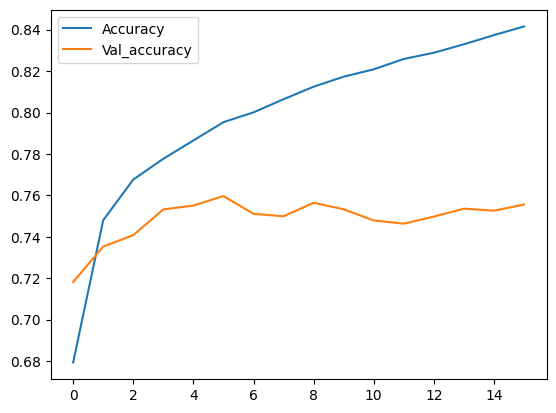

In [56]:
plt.plot(model.history['accuracy'],label='Accuracy') # loss is training loss
plt.plot(model.history['val_accuracy'],label='Val_accuracy') # val_loss loss on the validation data / test loss
plt.legend()
plt.show()

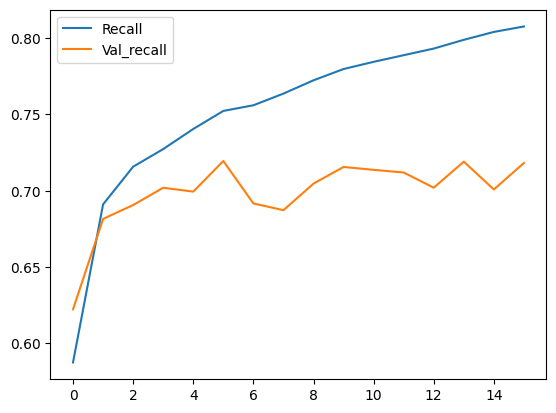

In [57]:
plt.plot(model.history['recall'],label='Recall') # loss is training loss
plt.plot(model.history['val_recall'],label='Val_recall') # val_loss loss on the validation data / test loss
plt.legend()
plt.show()

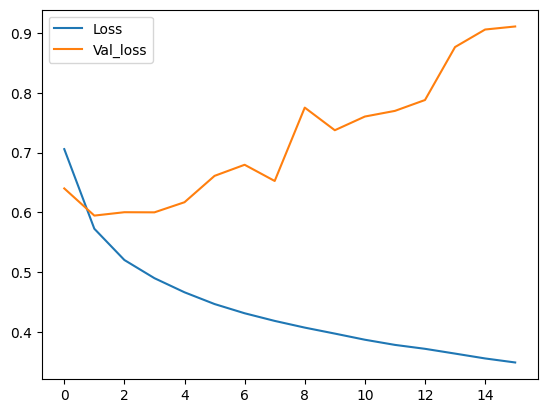

In [58]:
plt.plot(model.history['loss'],label='Loss') # loss is training loss
plt.plot(model.history['val_loss'],label='Val_loss') # val_loss loss on the validation data / test loss
plt.legend()
plt.show()

In [59]:
ypred=nn.predict(xts)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [60]:
loss,accuracy,recall=nn.evaluate(xts,yts)
print(f"Loss = {loss}")
print(f"Testing Accuracy = {accuracy}")
print(f"Testing Recall = {recall}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7545 - loss: 0.6479 - recall: 0.7163
Loss = 0.6515563130378723
Testing Accuracy = 0.7565500140190125
Testing Recall = 0.71875


##  <p style="padding:10px;background-color:Pink ;margin:10;color:#000000;font-family:newtimeroman;font-size:100% ;overflow:hidden;font-weight:50">Conclusion</p>

###  <p style="padding:10px;background-color:yellow ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;border-radius: 10px 10px ;overflow:hidden;font-weight:50">After comparing all the classification models CAT Boost Classifier obtained highest accurachy and recall score. Hence we can use CAT Boost model for classifying the new data points </p> 